In [1]:
import numpy as np

In [2]:
import pandas as pd

In [7]:
from sklearn import datasets


In [11]:
iris=datasets.load_iris()

In [13]:
X=iris.data[:,[2,3]]

In [15]:
y=iris.target

In [16]:
from sklearn.cross_validation import train_test_split

C:\Users\VarunTarun\Downloads\anaconda678679\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()

In [20]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_train_std=sc.transform(X_train)

In [23]:
X_test_std=sc.transform(X_test)

In [24]:
from sklearn.linear_model import Perceptron

In [25]:
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)

In [26]:
ppn.fit(X_train_std,y_train)

C:\Users\VarunTarun\Downloads\anaconda678679\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [27]:
y_pred=ppn.predict(X_test_std)

In [28]:
print((y_test !=y_pred).sum())

4


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
import matplotlib.pyplot as plt

In [32]:
from matplotlib.colors import ListedColormap

In [34]:
print(accuracy_score(y_test,y_pred))

0.9111111111111111


In [ ]:
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
      markers = ('s', 'x', 'o', '^', 'v')  
      colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
      cmap = ListedColormap(colors[:len(np.unique(y))])    # plot the decision surface 
      x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
      x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))   
      Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
      Z = Z.reshape(xx1.shape)   
      plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)   
      plt.xlim(xx1.min(), xx1.max())   
      plt.ylim(xx2.min(), xx2.max())   # plot all samples  
      X_test, y_test = X[test_idx, :], y[test_idx]                                  
      for idx, cl in enumerate(np.unique(y)):     
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)        
            # highlight test samples   
            if test_idx:       
                X_test, y_test = X[test_idx, :], y[test_idx]          
                plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
             
             

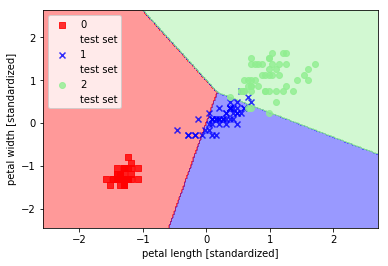

In [47]:
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((y_train, y_test)) 
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.show()
